In [51]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'BM YEONSUNG'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["axes.unicode_minus"] = False

In [8]:
Data=pd.read_excel("C:/Users/SAMSUNG/Desktop/세미_프로젝트2/정훈/수정데이터/빅데이터.xlsx")
Data.drop(columns=sum([[Data.columns[0]],list(Data.columns[-4:-2])],[]),inplace=True)

In [57]:
dt=pd.DataFrame(Data[(Data["콘텐츠분류"]=="숙박")|(Data["콘텐츠분류"]=="관광지")])

In [ ]:
dt

In [73]:
행정구역 = {'구좌':'구좌',
  '조천':'조천', 
  '화북': '동제주','봉개':'동제주', '회천':'동제주','용강':'동제주',
  '오라':'중제주','아라':'중제주','오등':'중제주','화북':'중제주','이도':'중제주','건입':'중제주','삼도':'중제주','용담':'중제주','일도':'중제주', 
  '도두':'서제주','이호':'서제주','외도':'서제주','내도':'서제주','도평':'서제주','노형':'서제주','연동':'서제주','강정':'서제주','도순':'서제주',
  '영남':'서제주','월평':'서제주','해안':'서제주', '노형':'서제주',
  '애월' :'애월',
  '성산':'성산',
  '한림':'한림',
  '표선':'표선',
  '남원':'남원',
  '한경':'한경',
  '안덕':'안덕',
  '영천':'동서귀','동흥':'동서귀','효돈':'동서귀','송산':'동서귀','신효':'동서귀','하효':'동서귀','서귀':'동서귀','보목':'동서귀','동홍':'동서귀',
  '대천':'중서귀','대륜':'중서귀','서홍':'중서귀', '강정':'중서귀','법환':'중서귀','서호':'중서귀','호근':'중서귀',
  '여래':'서서귀','중문':'서서귀','회수':'서서귀', '하원':'서서귀','대포':'서서귀', '색달':'서서귀', '하예':'서서귀', '상예':'서서귀',  
  '대정':'대정'}

In [74]:
def trans(x):
    for i in 행정구역.keys():
        try:
            if i in x:
                return 행정구역[i]
        except:
            break

In [76]:
error=[]
dt.loc[dt["콘텐츠분류"]=="관광지","행정구역"]=dt.loc[dt["콘텐츠분류"]=="관광지","지번주소"].apply(lambda x:trans(x))

In [80]:
숙박=dt[dt["행정구역"].isna()==False]

Text(0.5, 1.0, '행정구역별 숙박 및 관광지 분포도')

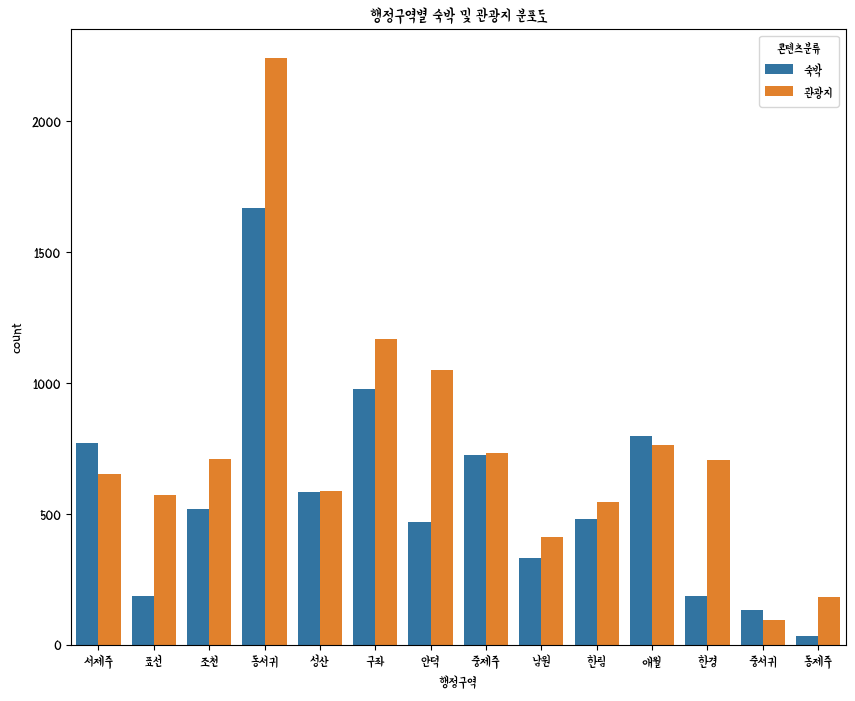

In [82]:
plt.figure()
sb.countplot(data=숙박,
             x="행정구역",
             hue="콘텐츠분류")
plt.title("행정구역별 숙박 및 관광지 분포도")

In [87]:
dt2=pd.DataFrame(숙박.groupby(["행정구역","콘텐츠분류"])["타이틀"].count()).unstack()
dt2

타이틀      
콘텐츠분류   관광지    숙박
행정구역             
구좌     1166   975
남원      413   330
동서귀    2240  1668
동제주     183    32
서제주     651   772
성산      586   585
안덕     1049   469
애월      763   798
조천      708   520
중서귀      95   134
중제주     732   725
표선      570   187
한경      704   185
한림      546   481

In [91]:
dt2.columns

MultiIndex([('타이틀', '관광지'),
            ('타이틀',  '숙박')],
           names=[None, '콘텐츠분류'])

<Axes: xlabel="('타이틀', '관광지')", ylabel="('타이틀', '숙박')">

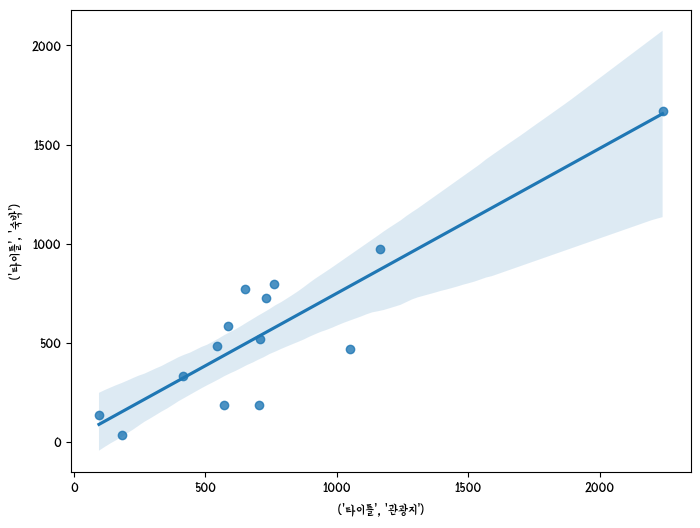

In [94]:
plt.rcParams["figure.figsize"] = (8, 6)
sb.regplot(x=dt2[('타이틀', '관광지')],
            y=dt2[('타이틀', '숙박')])